In [ ]:
import seaborn as sb
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pokedex=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/pokedex_(Update_05.20).csv')
pokedex.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,NaN,Chlorophyll,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,70.0,64.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13.0,2,Overgrow,NaN,Chlorophyll,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,70.0,142.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100.0,2,Overgrow,NaN,Chlorophyll,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,70.0,236.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,NaN,NaN,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,70.0,281.0,Medium Slow,2,Grass,Monster,87.5,20.0,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,0.6,8.5,2,Blaze,NaN,Solar Power,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,70.0,62.0,Medium Slow,2,Dragon,Monster,87.5,20.0,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


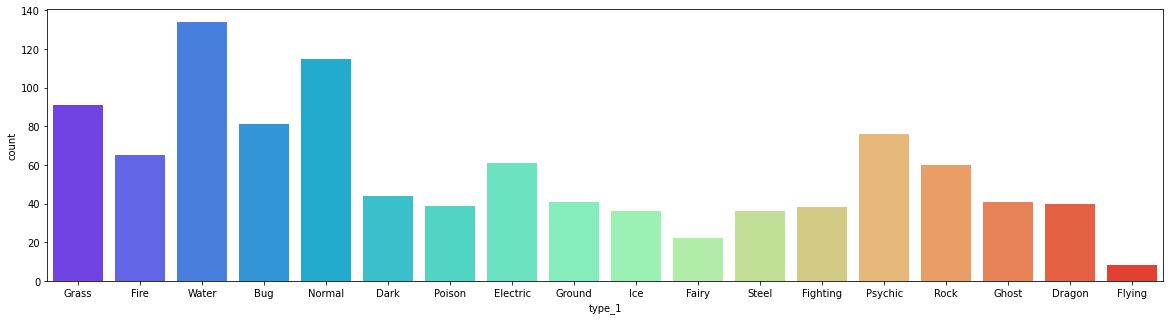

In [ ]:
plt.figure(figsize=(20,5))
sb.countplot(x='type_1',data=pokedex,palette='rainbow')

In [ ]:
tit=sb.load_dataset('titanic')
print("type: %s"%type(tit))
tit.head()

type: <class 'pandas.core.frame.DataFrame'>


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# EDA Step 1: Check for Null Values

isnull() : verbose form

heatmap(): visual form (easy to grasp)

In [ ]:
tit.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


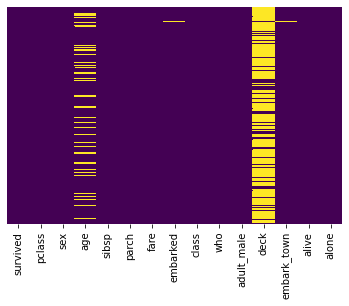

In [ ]:
sb.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Visualise the data using countplot

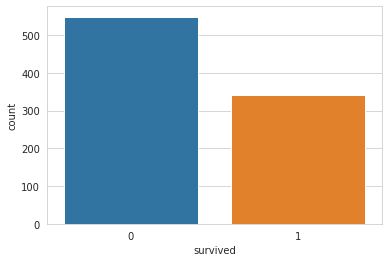

In [ ]:
sb.set_style('whitegrid')
sb.countplot(x='survived',data=tit)

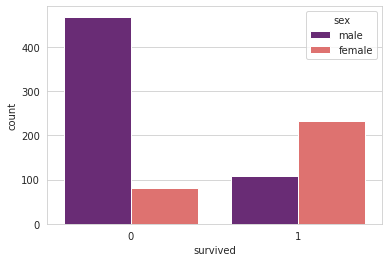

In [ ]:
sb.countplot(x='survived',data=tit,hue='sex',palette='magma')

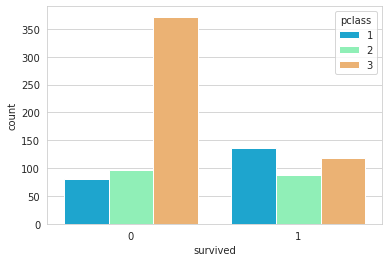

In [ ]:
sb.countplot(x='survived',data=tit,hue='pclass',palette='rainbow')

# **Distplot to find relation with age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


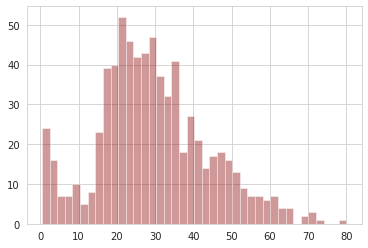

In [ ]:
sb.distplot(x=tit['age'].dropna(),kde=False,color='darkred',bins=40)

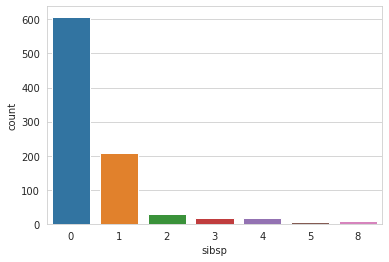

In [ ]:
sb.countplot(x='sibsp',data=tit)

# Data Cleaning

Remove null/NAN values from age and deck (primarily)

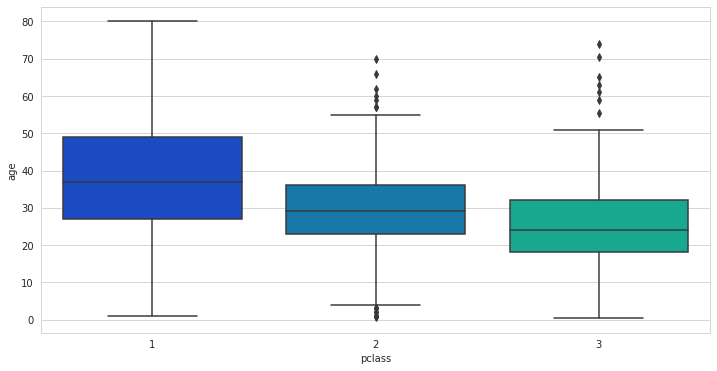

In [ ]:
plt.figure(figsize=(12,6))
sb.boxplot(x='pclass',y='age',data=tit,palette='winter')

In [ ]:
# returning the 50 percentile age according to the pclass that we infered from boxplot
def estimate_age(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age) :
    if pclass==1:
      return 38
    elif pclass==2:
      return 29
    elif pclass==3:
      return 25
  else:
    return age


In [ ]:
tit['age']=tit[['age','pclass']].apply(estimate_age,axis=1)

All null/nan values in age column has been replaced!

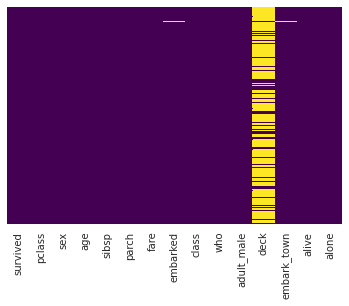

In [ ]:
sb.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
tit.drop('deck',axis=1,inplace=True)
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


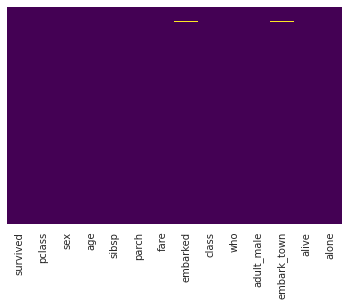

In [ ]:
sb.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Remove null in embarked and embark_town with highest freq value 

Southampton

S

In [ ]:
for i,data in enumerate(tit['embarked']):
  if pd.isnull(data):
    #tit['embarked'][i]='S'
    tit.at[i,'embarked']='S'

for i,data in enumerate(tit['embark_town']):
  if pd.isnull(data):
    #tit['embark_town'][i]='Southampton'
    tit.at[i,'embark_town']='Southampton'

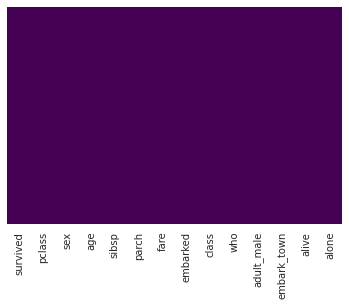

In [ ]:
sb.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Clean data without any nan/null values!

In [ ]:
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
tit.dropna(inplace=True)

In [ ]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.2+ KB


# Convert Categorical Features

Creating dummy variables using pandas (numerical format of categories)

For: Sex and Embark Column

pd.get_dummies()

In [ ]:
pd.get_dummies(tit['sex'],drop_first=True,).head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
sex=pd.get_dummies(tit['sex'],drop_first=True)
embarked=pd.get_dummies(tit['embarked'],drop_first=True)


Drop useless column like:
Embark_town,
alive,
alone,
who,
adult_male,
class

In [ ]:
tit.drop(['sex','embarked','embark_town','alive','alone','who','class','adult_male'],axis=1,inplace=True)

In [ ]:
tit.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
train=pd.concat([tit,sex,embarked],axis=1)
train.head()

,survived,pclass,age,sibsp,parch,fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Building a Logistic Regression Model

In [ ]:
  train.drop('survived',axis=1).head()

,pclass,age,sibsp,parch,fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [ ]:
#saving clean dataset for future use
train.to_csv("/content/drive/MyDrive/Colab Notebooks/DATA/Titanic_Clean.csv",index=false)
train['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(train.drop('survived',axis=1),train['survived'],test_size=0.3,random_state=101)

In [ ]:
print(len(X_train))
len(X_test)

623


268

In [ ]:
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions=model.predict(X_test)

In [ ]:
accuracy=confusion_matrix(Y_test,predictions)

In [ ]:
accuracy

array([[134,  20],
       [ 38,  76]])

In [ ]:
print(accuracy_score(Y_test,predictions))

0.7835820895522388


In [ ]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1])

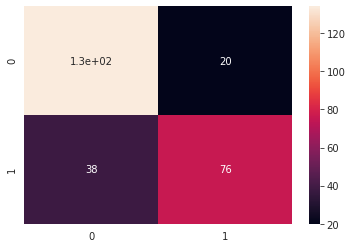

In [ ]:
accuracy=confusion_matrix(Y_test,predictions)
sb.heatmap(accuracy,annot=True)

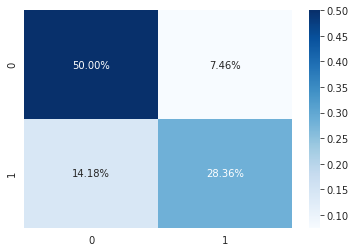

In [ ]:
sb.heatmap(accuracy/np.sum(accuracy),cmap='Blues',annot=True,fmt=".2%")

Text(0.5, 15.0, '\n\nAccuracy=0.784\nPrecision=0.792\nRecall=0.667\nF1 Score=0.724')

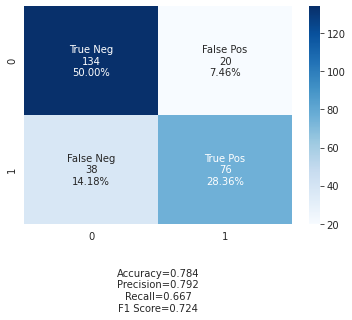

In [ ]:
group_names = ["True Neg",'False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                accuracy.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     accuracy.flatten()/np.sum(accuracy)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sb.heatmap(accuracy, annot=labels, fmt='', cmap='Blues')

###

#Accuracy is sum of diagonal divided by total observations
acc  = np.trace(accuracy) / float(np.sum(accuracy))
stats_text=''
#if it is a binary confusion matrix, show some more stats
if len(accuracy)==2:
    #Metrics for Binary Confusion Matrices
    precision = accuracy[1,1] / sum(accuracy[:,1])
    recall    = accuracy[1,1] / sum(accuracy[1,:])
    f1_score  = 2*precision*recall / (precision + recall)
    stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
        acc,precision,recall,f1_score)
else:
    stats_text = "\n\nAccuracy={:0.3f}".format(acc)

###

plt.xlabel(stats_text)


# Summary (Notes)

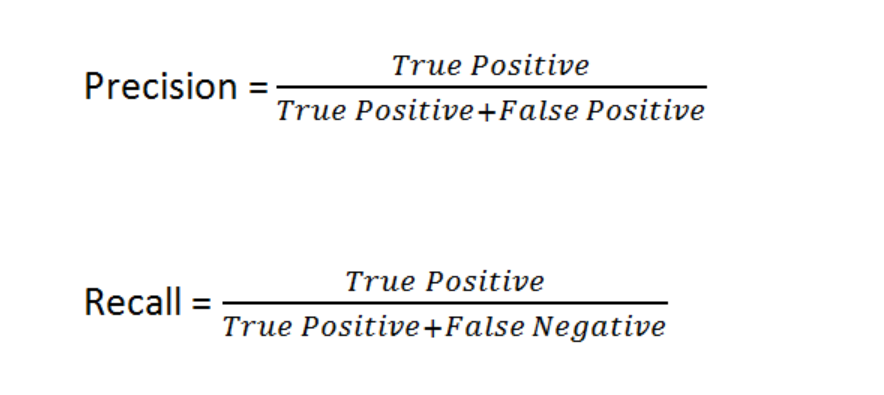

<hr>

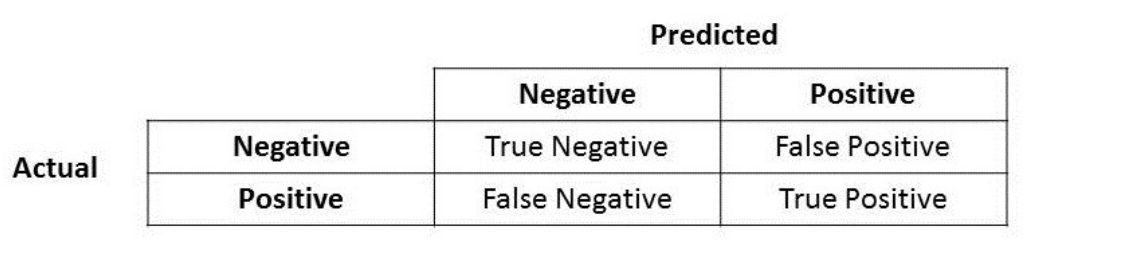

<hr>

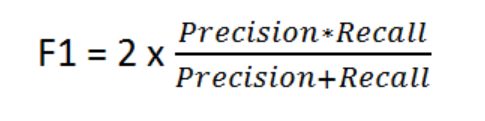

<hr>


**Points:**
* Precision tells if you have high false positives. (email spam) <br>
* Recall will tell if you have high false negatives. (fraud detection)
* F1 score is the approx ratio between precision and recall. Sometimes more useful than accuracy (as it takes care of false positives and false negatives too)
* More is the F1 scrore near to 1 better the model is even when accuracy is little down (~95)

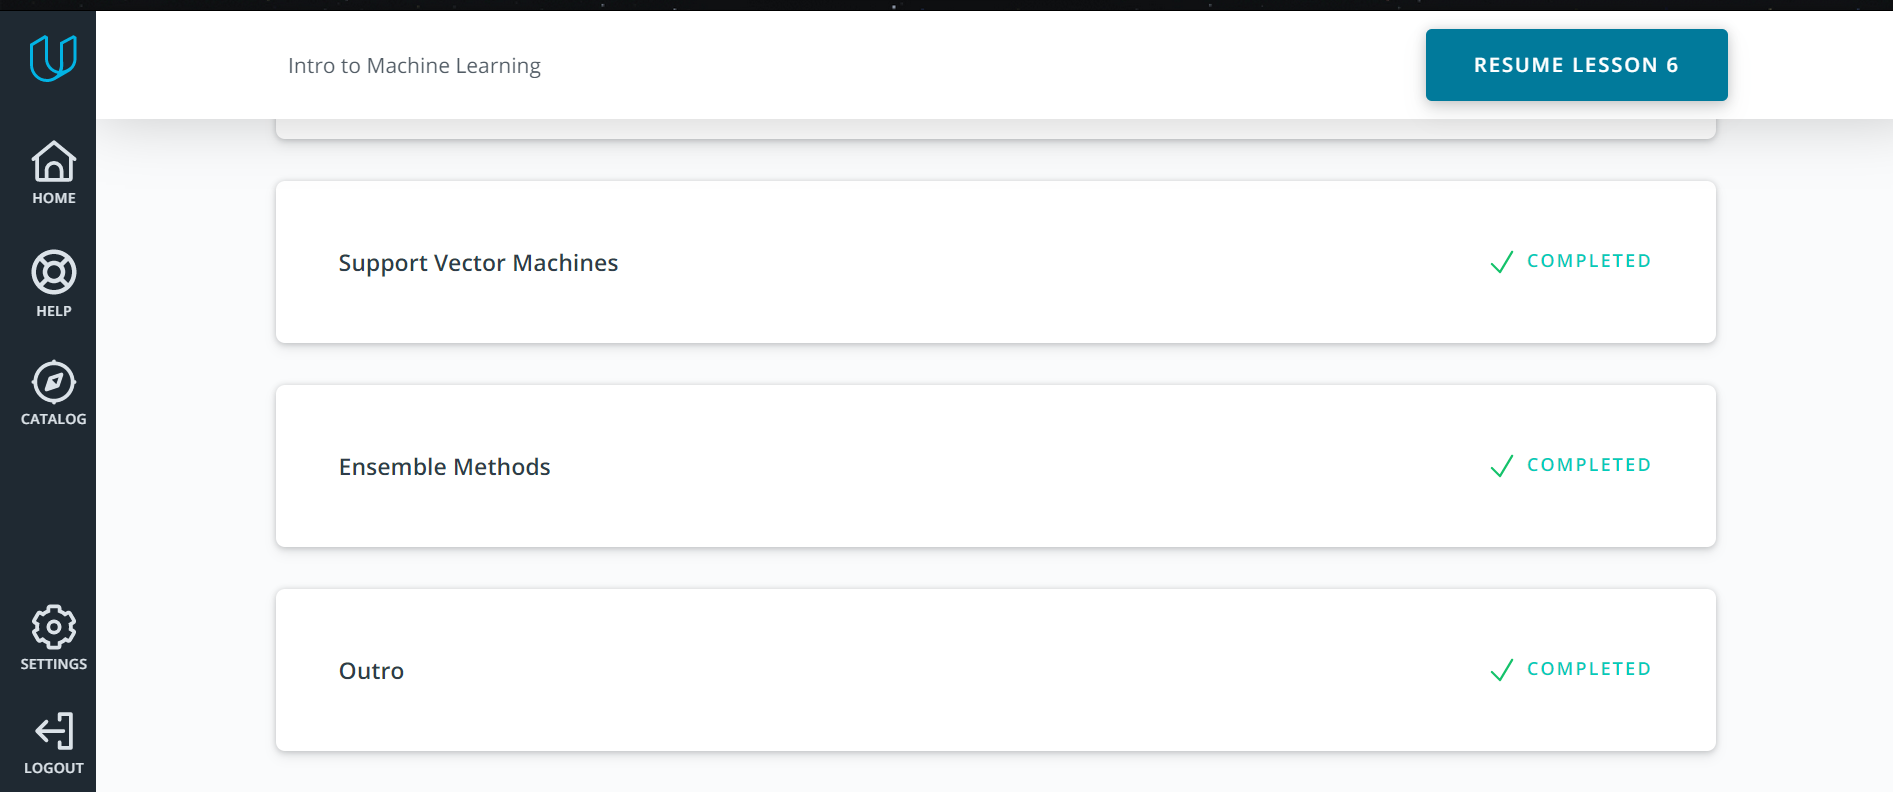